In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
from pylab import mpl

In [34]:
os.chdir(r'E:\github\CreditCardCustomerFeature')
snd = pd.read_csv('sndHsPr.csv')
snd.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268


In [35]:
snd['all_pr2'] = snd[['price', 'AREA']].apply(lambda x:x[0]*x[1], axis = 1)
snd.head()

,dist,roomnum,halls,AREA,floor,subway,school,price,all_pr2
0,chaoyang,1,0,46.06,middle,1,0,48850,2250031.00
1,chaoyang,1,1,59.09,middle,1,0,46540,2750048.60
2,haidian,5,2,278.95,high,1,1,71662,19990114.90
3,haidian,3,2,207.00,high,1,1,57972,12000204.00
4,fengtai,2,1,53.32,low,1,1,71268,3800009.76


In [36]:
district = {'fengtai': '丰台区', 'haidian': '海淀区', 'chaoyang': '朝阳区', 'dongcheng': '东城区', 'xicheng': '西城区', 'shijingshan': '石景山'}
snd['district'] = snd.dist.map(district)
snd.head()

,dist,roomnum,halls,AREA,floor,subway,school,price,all_pr2,district
0,chaoyang,1,0,46.06,middle,1,0,48850,2250031.00,朝阳区
1,chaoyang,1,1,59.09,middle,1,0,46540,2750048.60,朝阳区
2,haidian,5,2,278.95,high,1,1,71662,19990114.90,海淀区
3,haidian,3,2,207.00,high,1,1,57972,12000204.00,海淀区
4,fengtai,2,1,53.32,low,1,1,71268,3800009.76,丰台区


In [37]:
snd.district.value_counts()

丰台区    2947
海淀区    2919
朝阳区    2864
东城区    2783
西城区    2750
石景山    1947
Name: district, dtype: int64

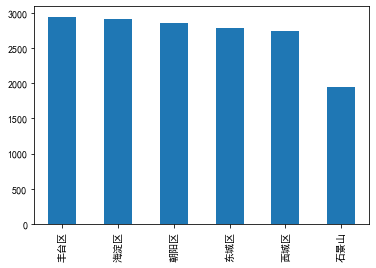

In [38]:
mpl.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号‘-’显示为方块的问题
snd.district.value_counts().plot(kind = 'bar')

In [39]:
snd.price.mean()

61151.810919185686

In [40]:
snd.price.median()

57473.0

In [41]:
snd.price.std()

22293.35814732866

In [42]:
snd.price.skew()

0.6794935869486859

In [43]:
snd.price.agg(['mean', 'median', 'sum', 'std', 'skew'])

mean      6.115181e+04
median    5.747300e+04
sum       9.912709e+08
std       2.229336e+04
skew      6.794936e-01
Name: price, dtype: float64

In [44]:
snd.price.quantile([0.01, 0.5, 0.99])

0.01     27104.45
0.50     57473.00
0.99    119996.85
Name: price, dtype: float64

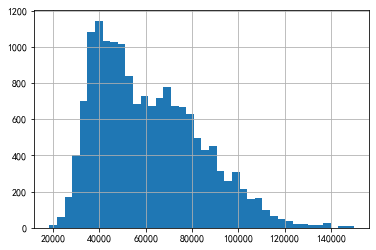

In [45]:
snd.price.hist(bins=40)

In [46]:
sub_sch = pd.crosstab(snd.district, snd.school)
sub_sch

school,0,1
district,,
东城区,1508,1275
丰台区,2853,94
朝阳区,2267,597
海淀区,1533,1386
石景山,1929,18
西城区,1207,1543


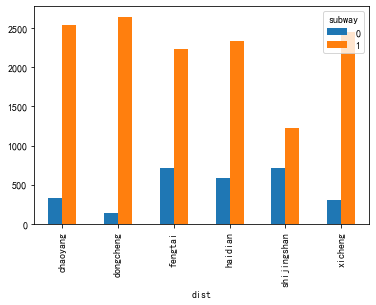

In [47]:
pd.crosstab(snd.dist, snd.subway).plot(kind='bar')

pandas.core.frame.DataFrame

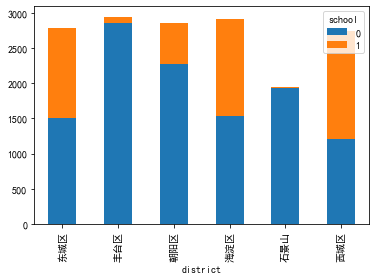

In [48]:
t1 = pd.crosstab(snd.district, snd.school)
t1.plot(kind = 'bar', stacked = True)
type(t1)

In [49]:
sub_sch = pd.crosstab(snd.district, snd.school)
sub_sch['sum1'] = sub_sch.sum(1)
sub_sch.head()

school,0,1,sum1
district,,,
东城区,1508,1275,2783
丰台区,2853,94,2947
朝阳区,2267,597,2864
海淀区,1533,1386,2919
石景山,1929,18,1947


In [50]:
sub_sch = sub_sch.div(sub_sch.sum1, axis = 0)
sub_sch

school,0,1,sum1
district,,,
东城区,0.541861,0.458139,1.0
丰台区,0.968103,0.031897,1.0
朝阳区,0.791550,0.208450,1.0
海淀区,0.525180,0.474820,1.0
石景山,0.990755,0.009245,1.0
西城区,0.438909,0.561091,1.0


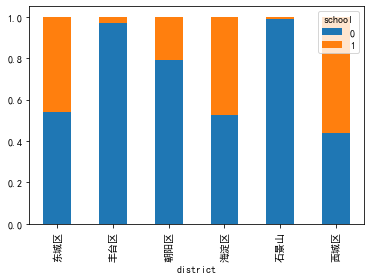

In [51]:
sub_sch[[0,1]].plot(kind = 'bar', stacked = True)

In [52]:
from stack2dim import *
stack2dim(snd, i = 'district', j = 'school')

ModuleNotFoundError: No module named 'stack2dim'

In [54]:
from pyecharts import Map

snd_price = list(zip(snd.price.groupby(snd.district).mean().index, snd.price.groupby(snd.district).mean().values))
attr, value = Map.cast(snd_price)
min_ = snd.price.groupby(snd.dist).mean().min()
Max_ = snd.price.groupby(snd.dist).mean().max()

map = Map('北京各区房价', width = 1200, height = 600)
map.add('', attr, value, maptype = '北京', is_visualmap = True, visual_range = [min_, max_], visual_text_color = '#000', is_label_show = True)
map.render()

ImportError: cannot import name 'Map' from 'pyecharts' (C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\__init__.py)